# Мини-проект: Анализ заказов с помощью SQLite и Pandas с использованием dtale

## Описание:
В этом проекте анализируются данные о заказах и пользователях с использованием базы данных **SQLite** и библиотеки **Pandas**. Мы создаем базу данных, генерируем фиктивные данные для заказов и пользователей, выполняем SQL-запросы для извлечения статистики и визуализируем результаты с помощью **Matplotlib**.

Проект также включает в себя интерактивное отображение данных через **`dtale`**, что позволяет удобно работать с данными через браузер.

**Цели проекта**:
- Создать базу данных и таблицы.
- Выполнить SQL-запросы для анализа данных.
- Визуализировать результаты.
- Использовать интерактивные инструменты для работы с данными с помощью **`dtale`**.
- Построить автоматизированный пайплайн для обработки данных.

## Стек технологий:
- **Python**
- **SQLite**
- **Pandas**
- **Matplotlib**
- **dtale**

##  Создание базы данных и таблиц
Для начала создадим базу данных SQLite и две таблицы: orders и users.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dtale
from IPython.display import display

In [2]:
def create_db():
    conn = sqlite3.connect(':memory:')
    cursor = conn.cursor()

    cursor.execute('''
    CREATE TABLE users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        email TEXT
    )
    ''')

    cursor.execute('''
    CREATE TABLE orders (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        user_id INTEGER,
        item TEXT,
        quantity INTEGER,
        price REAL,
        order_date TEXT,
        FOREIGN KEY (user_id) REFERENCES users (id)
    )
    ''')

    return conn, cursor

## Наполнение базы данных фиктивными данными
Далее, создадим несколько записей для обеих таблиц.

In [3]:
def insert_data(cursor):
    # Генерация данных для пользователей
    users_data = [
        ('John Doe', 'john.doe@example.com'),
        ('Jane Smith', 'jane.smith@example.com'),
        ('Tom Lee', 'tom.lee@example.com'),
        ('Alice Brown', 'alice.brown@example.com'),
        ('Charlie Black', 'charlie.black@example.com')
    ]
    
    cursor.executemany('''
    INSERT INTO users (name, email) VALUES (?, ?)
    ''', users_data)

    # Генерация данных для заказов
    np.random.seed(42)
    items = ['Book', 'Laptop', 'Pen', 'Headphones', 'Monitor']
    dates = pd.date_range(start='2023-01-01', end='2023-03-31', freq='D')
    orders_data = [
        (np.random.randint(1, 6), np.random.choice(items),
         np.random.randint(1, 5), round(np.random.uniform(5, 500), 2),
         pd.to_datetime(np.random.choice(dates)).strftime('%Y-%m-%d'))
        for _ in range(100)
    ]
    
    cursor.executemany('''
    INSERT INTO orders (user_id, item, quantity, price, order_date) VALUES (?, ?, ?, ?, ?)
    ''', orders_data)

    return cursor


## Выполнение SQL-запросов
Теперь мы можем выполнять SQL-запросы для извлечения данных. Пример:

In [4]:
def execute_queries(cursor):
    queries = {
        "Общее количество заказов": "SELECT COUNT(*) FROM orders",
        "Общий доход": "SELECT ROUND(SUM(quantity * price), 2) AS revenue FROM orders",
        "Средний чек": "SELECT ROUND(AVG(quantity * price), 2) AS avg_order FROM orders",
        "Самый популярный товар": "SELECT item, COUNT(*) AS freq FROM orders GROUP BY item ORDER BY freq DESC LIMIT 1",
        "Доход по дням": '''
            SELECT order_date, ROUND(SUM(quantity * price), 2) as daily_revenue 
            FROM orders GROUP BY order_date ORDER BY order_date
        '''
    }
    results = {}
    for title, q in queries.items():
        results[title] = pd.read_sql_query(q, cursor.connection)  # Используем connection для запроса
        print(f"--- {title} ---")
        display(results[title])
    return results

## Визуализация данных
Добавим графики для визуализации данных

In [5]:
# Шаг 4: Визуализация дохода по дням
def visualize_data(results):
    daily = results["Доход по дням"]
    daily['order_date'] = pd.to_datetime(daily['order_date'])
    plt.figure(figsize=(12, 5))
    plt.plot(daily['order_date'], daily['daily_revenue'], marker='o')
    plt.title('Доход по дням')
    plt.xlabel('Дата')
    plt.ylabel('Доход')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Закрытие соединения

In [6]:
def close_db(conn):
    conn.close()

## End-to-End пайплайн
Объединяем все шаги в одном пайплайне для автоматизации выполнения:

--- Общее количество заказов ---


,COUNT(*)
0,100


--- Общий доход ---


,revenue
0,73856.39


--- Средний чек ---


,avg_order
0,738.56


--- Самый популярный товар ---


,item,freq
0,Headphones,26


--- Доход по дням ---


,order_date,daily_revenue
0,2023-01-01,3000.84
1,2023-01-02,2077.76
2,2023-01-03,3753.49
3,2023-01-06,954.38
4,2023-01-09,946.44
5,2023-01-11,668.12
6,2023-01-14,644.82
7,2023-01-15,147.94
8,2023-01-16,1661.31
9,2023-01-17,2176.64


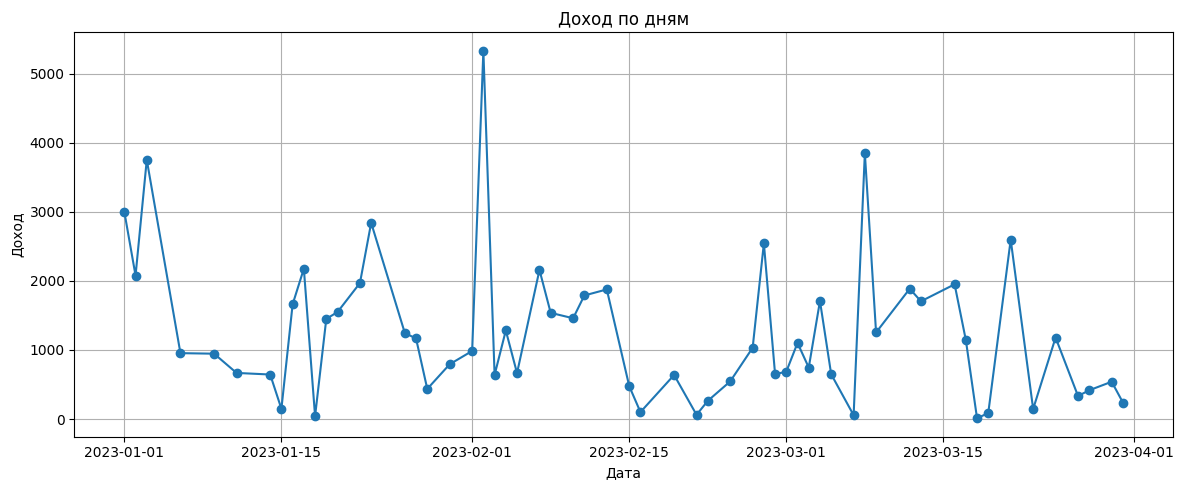

In [7]:
def full_pipeline():
    conn, cursor = create_db()  # Создаем базу данных и курсор
    cursor = insert_data(cursor)  # Вставляем данные
    results = execute_queries(cursor)  # Выполняем SQL-запросы
    visualize_data(results)  # Визуализируем данные

    daily_revenue_df = results["Доход по дням"]
    d = dtale.show(daily_revenue_df)  # Передаем только данные по доходу
    d.open_browser()

    close_db(conn)  # Закрытие соединения с базой данных

# Запуск пайплайна
full_pipeline()

## Выводы:
1. **База данных и таблицы**:
   - Успешно созданы две таблицы: **orders** (заказы) и **users** (пользователи).
   - Для демонстрации использованы фиктивные данные, сгенерированные с помощью **NumPy** и **Pandas**.

2. **SQL-запросы**:
   - Выполнены SQL-запросы для получения важной статистики по данным:
     - Общее количество заказов
     - Общий доход
     - Средний чек
     - Самый популярный товар
     - Доход по дням
   - Результаты запросов вывели в виде таблиц с помощью **Pandas**.

3. **Визуализация**:
   - График дохода по дням построен с использованием **Matplotlib**. Это помогает проанализировать динамику дохода с течением времени.

4. **Интерактивный вывод с использованием dtale**:
   - Результаты анализа выведены в интерактивной таблице с помощью **`dtale`**, что позволяет визуально и интерактивно исследовать данные.

5. **Пайплайн**:
   - Все этапы обработки данных: создание базы данных, выполнение SQL-запросов, визуализация данных, интерактивная работа с результатами — автоматизированы в рамках пайплайна.

**Итог**:
Проект успешно автоматизирует анализ данных о заказах с использованием SQLite и Pandas, что позволяет легко работать с большими объемами данных и получать результаты в виде удобных для анализа таблиц и графиков.